 1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
 on the test set. Hint: the KNeighborsClassifier works quite well for this task;
 you just need to find good hyperparameter values (try a grid search on the
 weights and n_neighbors hyperparameters).

In [6]:
%pip install tensorflow numpy pandas matplotlib seaborn scikit-learn scikit-learn-intelex

Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')) > 0)
print(tf.config.list_physical_devices('GPU'))

False
[]


In [8]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [9]:
mnist = tf.keras.datasets.mnist
mnist_set= mnist.load_data() 
(x_train, y_train), (x_val, y_val) = mnist_set

KNeighborsClassifier

In [10]:
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32') / 255
x_val = x_val.reshape((x_val.shape[0], 28*28)).astype('float32') / 255


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

KN= KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
KN.fit(x_train, y_train)
y_pred = KN.predict(x_val)
print(accuracy_score(y_val, y_pred))

0.9705


tf.Tensor(
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]], shape=(10, 10), dtype=int32)


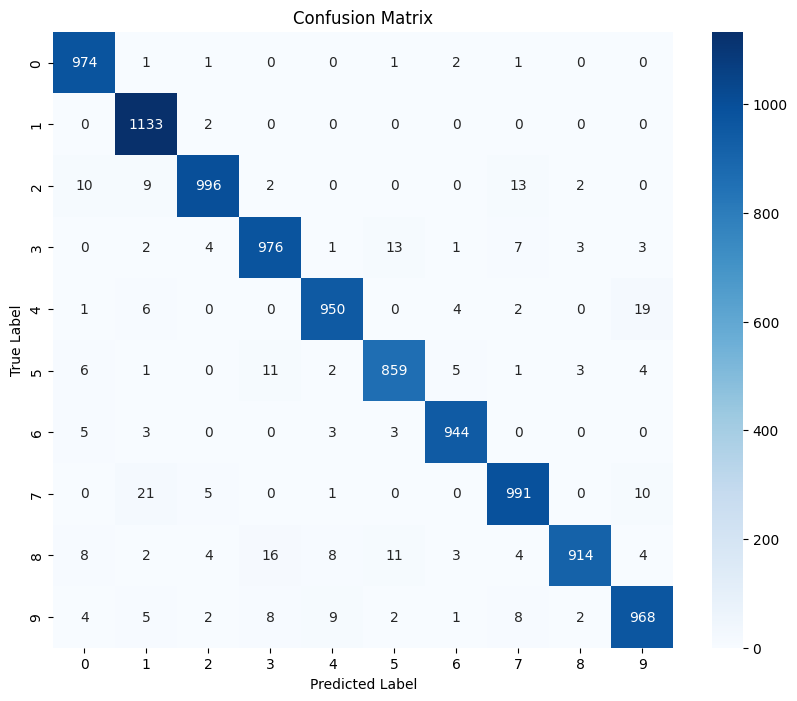

In [12]:
confusion_matrix = tf.math.confusion_matrix(y_val, y_pred)
print(confusion_matrix)

#plot inn graph
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Precision and Recall and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9706882342922246
Recall: 0.9705
F1 Score: 0.9704523390961245


In [14]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(KN, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
# Best model evaluation
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(x_val)
print("Best model accuracy: ", accuracy_score(y_val, y_pred_best))
# Best model confusion matrix


Fitting 3 folds for each of 10 candidates, totalling 30 fits


e:\AI\ai-ml-course\.venv\lib\site-packages\sklearn\utils\parallel.py:29: UserWarning: `sklearn.utils.parallel.Parallel` needs to be used in conjunction with `sklearn.utils.parallel.delayed` instead of `joblib.delayed` to correctly propagate the scikit-learn configuration to the joblib workers.
  warnings.warn(


Best parameters found:  {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score:  0.9693333333333333
Best model accuracy:  0.9717


----

2. Write a function that can shift an MNIST image in any direction (left, right, up,
 or down) by one pixel.5 Then, for each image in the training set, create four shif
ted copies (one per direction) and add them to the training set. Finally, train your
 best model on this expanded training set and measure its accuracy on the test set.
 You should observe that your model performs even better now! This technique of
 artificially growing the training set is called data augmentation or training set
 expansion.

In [15]:
%pip install spicy

Note: you may need to restart the kernel to use updated packages.


In [27]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image= image.reshape((28,28))
    shifted_image= shift(image,(dx, dy))
    return shifted_image.reshape(784)


In [28]:
x_train_augmented = [image for image in x_train]
y_train_augmented = [label for label in y_train]

In [29]:
shifts = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Left, right, up, down
for dx, dy in shifts:
    for image, label in zip(x_train, y_train):
        shifted = shift_image(image, dx, dy)
        x_train_augmented.append(shifted)
        y_train_augmented.append(label)

In [30]:
import numpy as np

x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [32]:
# Train the best KNeighborsClassifier model on the augmented data
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_clf.fit(x_train_augmented, y_train_augmented)

# Evaluate accuracy on the test set
y_pred_augmented = knn_clf.predict(x_val)
augmented_accuracy = accuracy_score(y_val, y_pred_augmented)
print(f"Test set accuracy after data augmentation: {augmented_accuracy * 100:.2f}%")

Test set accuracy after data augmentation: 97.56%


tf.Tensor(
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   6    2 1006    2    1    0    2   12    1    0]
 [   0    2    4  983    1    9    0    5    4    2]
 [   1    6    0    0  951    0    4    2    0   18]
 [   2    2    0    9    0  868    5    1    3    2]
 [   7    4    0    0    2    2  943    0    0    0]
 [   0   19    3    1    3    0    0  995    0    7]
 [   6    0    4   12    4    9    2    4  930    3]
 [   1    7    1    6    7    4    1    8    1  973]], shape=(10, 10), dtype=int32)


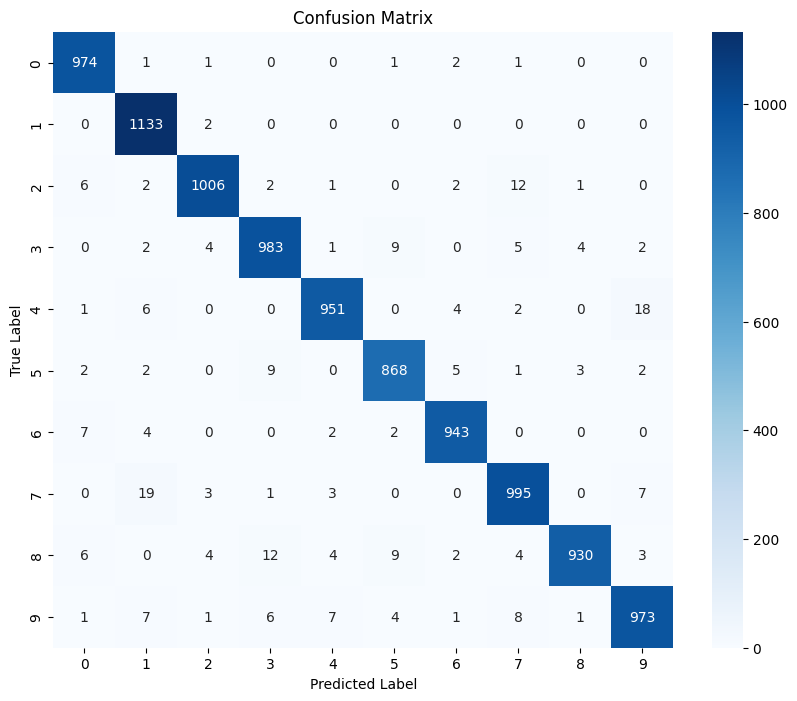

In [33]:
# print confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_val, y_pred_augmented)
print(confusion_matrix)

#plot inn graph
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()